In [ ]:
#Mount Google Drive as "gdrive" inside the file -> content section
from google.colab import drive

drive.mount('/content/gdrive')

!pip install ultralytics

Mounted at /content/gdrive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 654.0/654.0 kB 7.2 MB/s eta 0:00:00


In [ ]:
 from zipfile import ZipFile as zf
 output = '/content/kaggledata'
 zf1 = zf('/content/gdrive/MyDrive/SEP_799_Part_II /3D-Printer-Binary-Data/Dec3rdBinaryData_Sep799.zip', 'r') # read input zip file
 zf1.extractall(output) # extract to the output_dir in this case /content/sample_data
 zf1.close()

In [ ]:
import os

# Define the base directory
base_dir = '/content/kaggle_printer_data'

# Define the sub-directories
sub_dirs = ['train', 'valid', 'test']

# Define the category directories
categories = ['defect', 'no_defect']

# Create the directory structure
for sub_dir in sub_dirs:
    for category in categories:
        # Construct the path for each category inside each sub-directory
        dir_path = os.path.join(base_dir, sub_dir, category)

        # Create the directory, including intermediate directories
        os.makedirs(dir_path, exist_ok=True)

print("Directory structure created successfully.")

Directory structure created successfully.


In [ ]:
import os
import random
import shutil

# Set the path for the source folder and target folders
source_0 = '/content/kaggledata/train/0'
train_0 = '/content/kaggle_printer_data/train/no_defect'
valid_0 = '/content/kaggle_printer_data/valid/no_defect'
test_0 = '/content/kaggle_printer_data/test/no_defect'

files = os.listdir(source_0)
random.shuffle(files)

total_files = len(files)
split_index_1 = int(0.2 * total_files)  # 88% for folder 1
split_index_2 = split_index_1 + int(0.8 * total_files)  # Additional 8% for folder 2

# The remaining files (4%) go to folder 3, so no need for a separate index

# Split the files according to the ratios
files_for_folder_1 = files[:split_index_1]
files_for_folder_2 = files[split_index_1:split_index_2]
files_for_folder_3 = files[split_index_2:]

# Move the files to the respective folders
for file in files_for_folder_1:
    shutil.move(os.path.join(source_0, file), test_0)

for file in files_for_folder_2:
    shutil.move(os.path.join(source_0, file), train_0)

for file in files_for_folder_3:
    shutil.move(os.path.join(source_0, file), valid_0)

In [ ]:
import os
import random
import shutil

# Set the path for the source folder and target folders
source_1 = '/content/kaggledata/train/1'
train_1 = '/content/kaggle_printer_data/train/defect'
valid_1 = '/content/kaggle_printer_data/valid/defect'
test_1 = '/content/kaggle_printer_data/test/defect'

files = os.listdir(source_1)
random.shuffle(files)

total_files = len(files)
split_index_1 = int(0.2 * total_files)  # 88% for folder 1
split_index_2 = split_index_1 + int(0.8 * total_files)  # Additional 8% for folder 2

# The remaining files (4%) go to folder 3, so no need for a separate index

# Split the files according to the ratios
files_for_folder_1 = files[:split_index_1]
files_for_folder_2 = files[split_index_1:split_index_2]
files_for_folder_3 = files[split_index_2:]

# Move the files to the respective folders
for file in files_for_folder_1:
    shutil.move(os.path.join(source_1, file), test_1)

for file in files_for_folder_2:
    shutil.move(os.path.join(source_1, file), train_1)

for file in files_for_folder_3:
    shutil.move(os.path.join(source_1, file), valid_1)

In [ ]:
!yolo task=detect mode=predict model="/content/gdrive/MyDrive/SEP_799_Part_II /Dec3_Run_History/runs/classify/train/weights/best.pt" conf=0.25 source=/content/kaggle_printer_data/test/defect

In [ ]:
#import all necessary libraries
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load the trained model model
model = YOLO(r"/content/gdrive/MyDrive/SEP_799_Part_II /Dec3_Run_History/runs/classify/train/weights/best.pt")

# Open the video file (upload to Google Drive first)
video_path = r"/content/gdrive/MyDrive/SEP_799_Part_II /3DPrinting_SampleVideo1.mp4"
cap = cv2.VideoCapture(video_path)

# Initialize counter and parameter
defect_counter = {
    "defect": 0,
    "no defect": 0
}
defect_classifier = []
error_message = []
is_defect = False
#printing_status = ""

#Names: {0: 'defected', 1: 'no_defected'}

# Loop through the video frames
while cap.isOpened():
    success, frame = cap.read()
    if success:
        # Run YOLOv8 inference on the frame
        results = model(frame)

        # Check for classification types confidence score, if it is more than no defect, add one to the defect type counter
        for detection in results:
            if detection.probs.data[0] >= detection.probs.data[1]:
                defect_counter["defect"] += 1
                defect_classifier.append(0)
                break
            elif detection.probs.data[1] >= detection.probs.data[0]:
                defect_counter["no defect"] += 1
                defect_classifier.append(1)
                break

        if len(defect_classifier) >= 30 and defect_classifier[-30:].count(0) >= 25:
          current_index = len(defect_classifier) - 1
          index_30_before = current_index - 30 + 1

          error_message.append(f"Defect Detected!!! Error Range between index {index_30_before} to {current_index}.")
          is_defect = True

    else:
        # Break the loop if the end of the video is reached
        break


# Release the video capture object and close the display window
cap.release()



0: 224x224 no_defect 0.89, defect 0.11, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 no_defect 0.92, defect 0.08, 23.8ms
Speed: 3.8ms preprocess, 23.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 no_defect 0.89, defect 0.11, 22.0ms
Speed: 0.9ms preprocess, 22.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 no_defect 0.89, defect 0.11, 29.3ms
Speed: 0.9ms preprocess, 29.3ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 no_defect 0.92, defect 0.08, 25.8ms
Speed: 1.0ms preprocess, 25.8ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 no_defect 0.90, defect 0.10, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 no_defect 0.89, defect 0.11, 20.1ms
Speed: 1.2ms preprocess, 20.1ms inference, 0.1ms postprocess per image at shape (1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume defect_results is a list of boolean values representing defect detection per frame
data = defect_classifier
time_points = range(len(data))

# Create two lists to hold the time points for each value (0 and 1)
time_ones = [t for t, value in enumerate(data) if value == 1]
time_zeros = [t for t, value in enumerate(data) if value == 0]

# Values for the plot - all ones and all zeros
values_ones = [1] * len(time_ones)
values_zeros = [0] * len(time_zeros)

Analyze Complete

No defect is detected


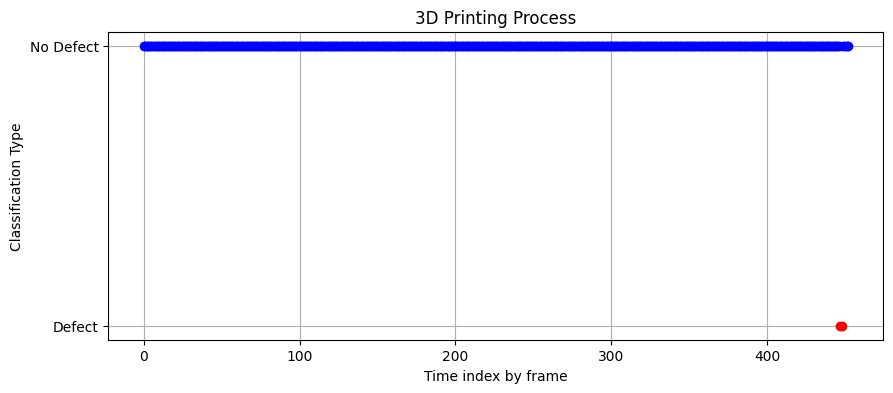

Inference analysis is the determination by frame, this does not really represent the determination of defect vs. no defect

2 defect detected through inference analysis

451 no defect detected through inference analysis


In [ ]:
# Return closure
print("Analyze Complete")
print("")

#Is there defect?
if is_defect == False:
  print("No defect is detected")
else:
  print("Defect detected!!!")
  print("")
  for defect in error_message:
    print(defect)

# Display the plot
# Plotting
plt.figure(figsize=(10, 4))

# Plot for ones (value 1) in blue
plt.plot(time_ones, values_ones, 'bo-', label='1 (One)')

# Plot for zeros (value 0) in red
plt.plot(time_zeros, values_zeros, 'ro-', label='0 (Zero)')

# Customize the plot
plt.xlabel('Time index by frame')
plt.ylabel('Classification Type')
plt.title('3D Printing Process')
plt.yticks([0, 1], ['Defect', 'No Defect'])
plt.grid(True)
plt.show()

# Print Output
print("Inference analysis is the determination by frame, this does not really represent the determination of defect vs. no defect")
print("")
print("{} defect detected through inference analysis".format(defect_counter["defect"]))
print("")
print("{} no defect detected through inference analysis".format(defect_counter["no defect"]))